In [1]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('MLPX', start='2025-01-27', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,MLPX,MLPX,MLPX,MLPX,MLPX
Date,,,,,
2025-02-25,61.169998,61.980000,60.029999,61.700001,1490800
2025-02-26,61.730000,61.799999,60.970001,61.250000,705000
2025-02-27,61.209999,61.919998,60.959999,61.799999,433000
2025-02-28,63.209999,63.209999,61.330002,61.330002,469800
2025-03-03,62.279999,63.779999,61.730000,63.389999,548300


<Axes: xlabel='Date'>

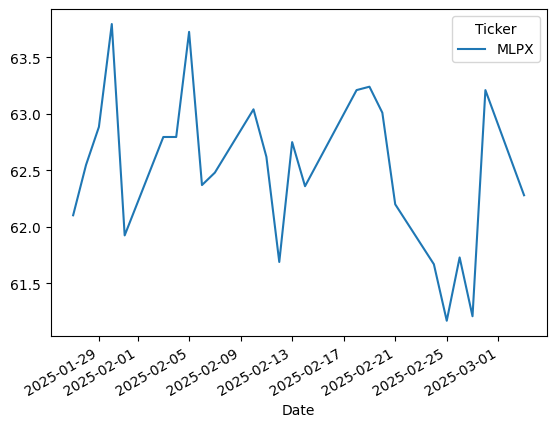

In [4]:
data['Close'].plot()

In [5]:
# convert time to ordinal
time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

In [6]:
time[:10]

array([739278, 739279, 739280, 739281, 739282, 739285, 739286, 739287,
       739288, 739289])

In [7]:
# create list of observation data
price = np.log(data['Close'].values).reshape(-1)
# normalized_priced = price / np.max(price)

In [8]:
price[:10]

array([4.12879357, 4.13593476, 4.14129672, 4.15566295, 4.12592273,
       4.13988016, 4.13988016, 4.15457711, 4.13308437, 4.1348465 ])

In [9]:
time.shape, price.shape

((25,), (25,))

In [10]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [11]:
observations.shape

(2, 25)

In [35]:
# for _ in range(5):
#     lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
#     tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)
#     print(pd.Timestamp.fromordinal(int(tc)))

In [12]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4, factor_sigma=0.03)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=172719, Tue Mar  4 21:10:11 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 5.210748895085302e-04 1.0e+00 9.01e-01  2e-02  5e+03 0:07.4
    2    320 5.197795247461924e-04 4.4e+00 8.86e-01  2e-02  1e+03 0:07.5
    3    480 5.177097175527657e-04 1.7e+01 8.68e-01  2e-02  8e+02 0:07.6
   32   5120 4.553116723889856e-04 7.4e+03 1.11e+01  1e-04  4e-02 0:10.6
   41   6560 4.553116710781268e-04 4.9e+03 7.94e+00  3e-07  8e-05 0:11.2
2025-03-17 00:00:00


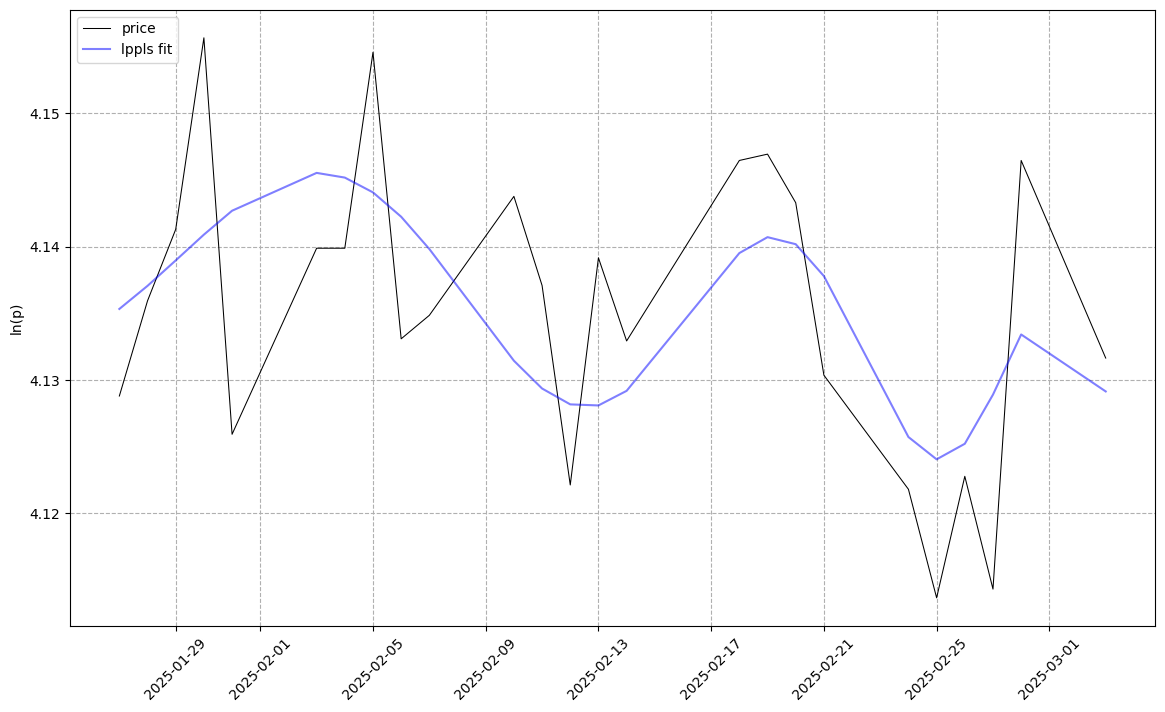

In [13]:
# visualize the fit
lppls_model.plot_fit()